<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

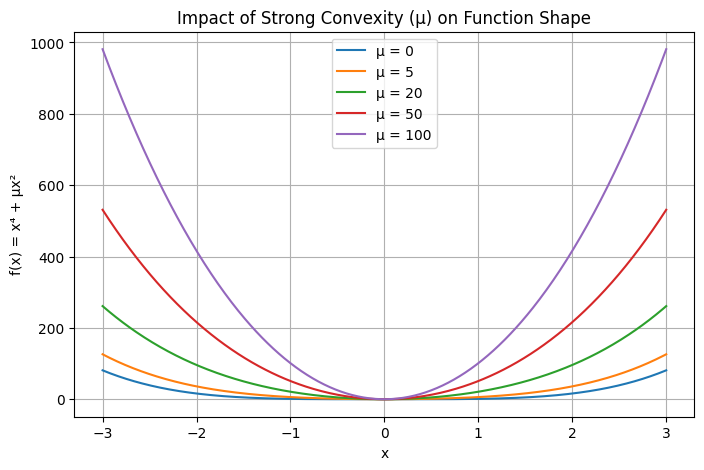

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-3, 3, 500)

# Define different mu values
mu_values = [0, 5, 20, 50, 100]

# Plot functions
plt.figure(figsize=(8, 5))
for mu in mu_values:
    f = x**4 + mu * x**2
    plt.plot(x, f, label=f'μ = {mu}')

plt.title("Impact of Strong Convexity (μ) on Function Shape")
plt.xlabel("x")
plt.ylabel("f(x) = x⁴ + μx²")
plt.legend()
plt.grid(True)
plt.show()


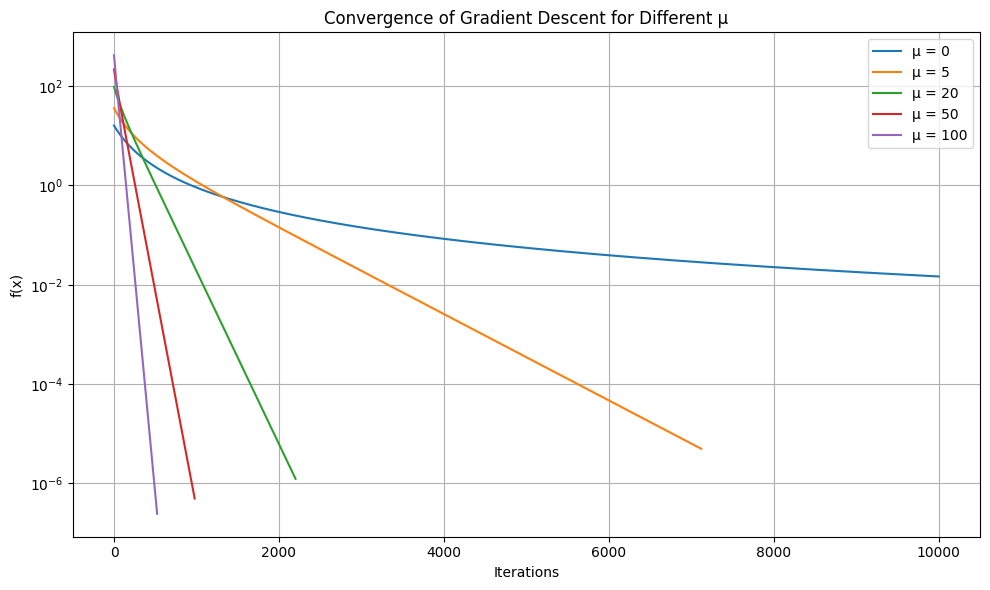

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, mu):
    return x**4 + mu * x**2

def grad_f(x, mu):
    return 4 * x**3 + 2 * mu * x

# Gradient descent implementation
def gradient_descent(mu, x0=2.0, lr=1e-4, tol=1e-6, max_iters=10000):
    x = x0
    history = []
    for i in range(max_iters):
        fx = f(x, mu)
        history.append(fx)
        grad = grad_f(x, mu)
        x_new = x - lr * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
    return history

# Try for different values of mu
mu_values = [0, 5, 20, 50, 100]
results = {}

for mu in mu_values:
    loss_history = gradient_descent(mu)
    results[mu] = loss_history

# Plotting
plt.figure(figsize=(10, 6))
for mu, losses in results.items():
    plt.plot(losses, label=f'μ = {mu}')

plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.title('Convergence of Gradient Descent for Different μ')
plt.yscale('log')  # Optional: log scale for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


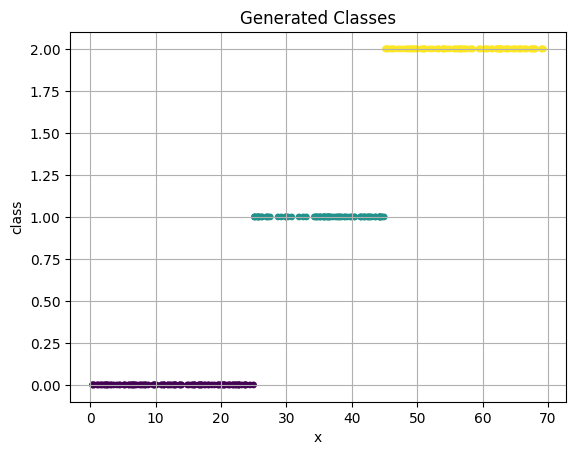

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(42)

# Generate numbers
x = np.random.uniform(0, 70, 300).reshape(-1, 1)

# Define labels
y = np.where(x < 25, 0, np.where(x <= 45, 1, 2)).ravel()

# Visualize
plt.scatter(x, y, c=y, cmap='viridis', s=15)
plt.xlabel("x")
plt.ylabel("class")
plt.title("Generated Classes")
plt.grid(True)
plt.show()


In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Normalize input
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train multinomial logistic regression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(x_train_scaled, y_train)

# Predict
y_pred = clf.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


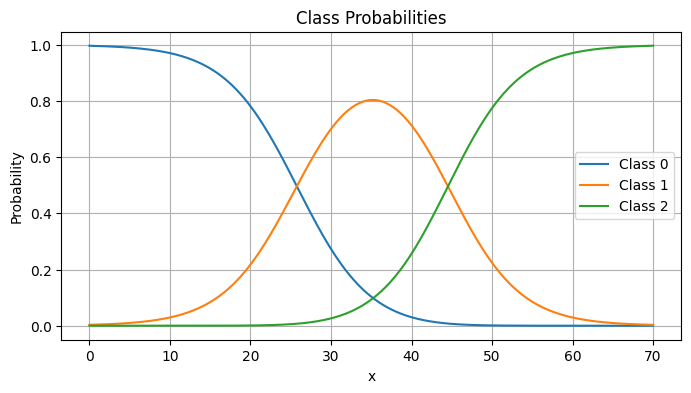

In [ ]:
# Visualize probabilities
x_plot = np.linspace(0, 70, 300).reshape(-1, 1)
x_plot_scaled = scaler.transform(x_plot)
probs = clf.predict_proba(x_plot_scaled)

plt.figure(figsize=(8, 4))
for i in range(3):
    plt.plot(x_plot, probs[:, i], label=f'Class {i}')

plt.title("Class Probabilities")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Generate 1D input x
X = np.linspace(0, 70, 300).reshape(-1, 1)

# Assign labels based on thresholds
def label_fn(x):
    if x < 25:
        return 0
    elif x <= 45:
        return 1
    else:
        return 2

y = np.array([label_fn(xi[0]) for xi in X])


In [ ]:
def one_hot(y, num_classes):
    onehot = np.zeros((len(y), num_classes))
    onehot[np.arange(len(y)), y] = 1
    return onehot

Y = one_hot(y, 3)

In [ ]:
# Initialize weights and biases
W = np.random.randn(1, 3) * 0.01
b = np.zeros((1, 3))

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [ ]:
def cross_entropy(Y_pred, Y_true):
    return -np.mean(np.sum(Y_true * np.log(Y_pred + 1e-9), axis=1))


In [ ]:
lr = 0.001
num_epochs = 300
losses = []

for epoch in range(num_epochs):
    # Forward pass
    Z = X @ W + b  # shape (N, 3)
    Y_pred = softmax(Z)

    # Loss
    loss = cross_entropy(Y_pred, Y)
    losses.append(loss)

    # Backward pass
    dZ = (Y_pred - Y) / X.shape[0]
    dW = X.T @ dZ  # shape (1, 3)
    db = np.sum(dZ, axis=0, keepdims=True)  # shape (1, 3)

    # Parameter update
    W -= lr * dW
    b -= lr * db

print(f"Final loss: {losses[-1]:.4f}")


Final loss: 0.2540


In [ ]:
int(np.argmax([[7]] @ W + b)+1), int(np.argmax([[27]] @ W + b)+1), int(np.argmax([[57]] @ W + b)+1)

(1, 2, 3)

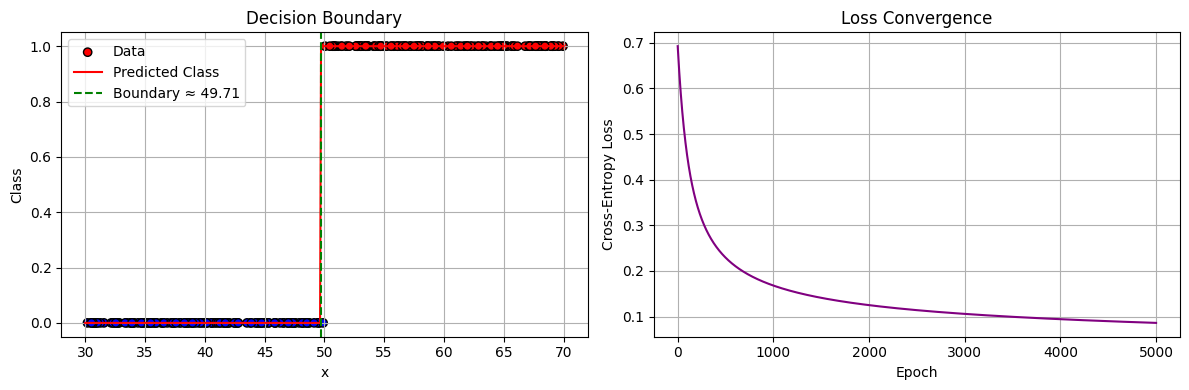

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Data
np.random.seed(0)
N = 300
x = np.random.uniform(30, 70, size=(N, 1))
y = np.where(x <= 50, 0, 1)

# Normalize
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std

# One-hot encode
def one_hot(y, num_classes=2):
    return np.eye(num_classes)[y]

Y = one_hot(y.flatten())

# Initialize
W = np.random.randn(1, 2) * 0.01
b = np.zeros((1, 2))

# Softmax and loss
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    e_z = np.exp(z)
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def compute_loss(Y, P):
    eps = 1e-15
    P = np.clip(P, eps, 1 - eps)
    return -np.mean(np.sum(Y * np.log(P), axis=1))

# Training loop
learning_rate = 0.01
epochs = 5000
loss_history = []

for epoch in range(epochs):
    Z = x_norm @ W + b
    P = softmax(Z)
    loss = compute_loss(Y, P)
    loss_history.append(loss)

    dZ = P - Y
    dW = x_norm.T @ dZ / N
    db = np.sum(dZ, axis=0, keepdims=True) / N

    W -= learning_rate * dW
    b -= learning_rate * db

# Predict function
def predict(x_input):
    Z = x_input @ W + b
    P = softmax(Z)
    return np.argmax(P, axis=1)

# Plotting
x_plot = np.linspace(30, 70, 500).reshape(-1, 1)
x_plot_norm = (x_plot - x_mean) / x_std
y_plot = predict(x_plot_norm)

# Decision boundary
w0, w1 = W[0, 0], W[0, 1]
b0, b1 = b[0, 0], b[0, 1]
boundary_x = (b1 - b0) / (w0 - w1) * x_std + x_mean if w0 != w1 else None

# Subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Left: Decision boundary
axs[0].scatter(x, y, c=y, cmap="bwr", edgecolors="k", label="Data")
axs[0].plot(x_plot, y_plot, color='red', label="Predicted Class")
if boundary_x is not None:
    axs[0].axvline(x=boundary_x, color='green', linestyle='--', label=f"Boundary ≈ {boundary_x:.2f}")
axs[0].set_title("Decision Boundary")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Class")
axs[0].legend()
axs[0].grid(True)

# Right: Loss curve
axs[1].plot(loss_history, color='purple')
axs[1].set_title("Loss Convergence")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Cross-Entropy Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()


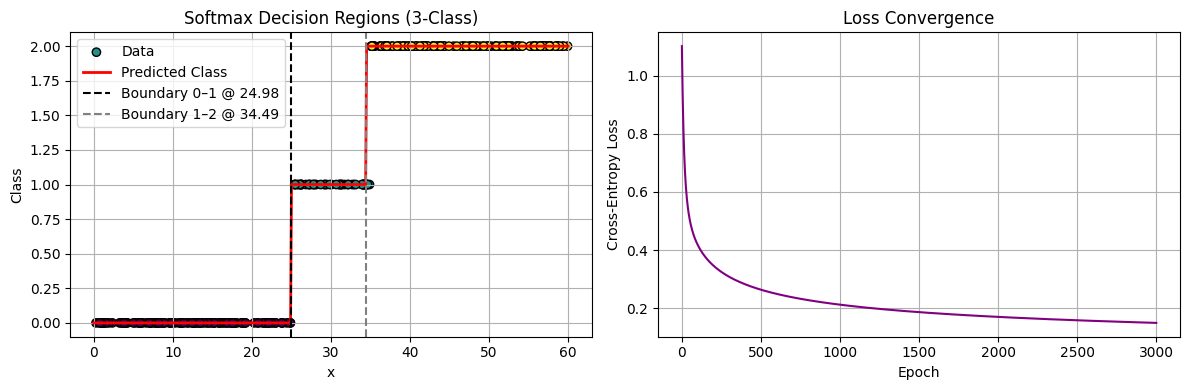

(np.float64(24.97591016764737), np.float64(34.49031911217169))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1D data with 3-class rule
np.random.seed(0)
N = 300
x = np.random.uniform(0, 60, size=(N, 1))

# Assign labels based on piecewise rule
def assign_label(x_val):
    if x_val <= 25:
        return 0
    elif x_val < 35:
        return 1
    else:
        return 2

y = np.array([assign_label(xi) for xi in x.flatten()])

# Normalize input
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std

# One-hot encode labels
def one_hot(y, num_classes=3):
    return np.eye(num_classes)[y]

Y = one_hot(y)

# Initialize weights and biases
W = np.random.randn(1, 3) * 0.01
b = np.zeros((1, 3))

# Softmax and loss
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # stability
    e_z = np.exp(z)
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def compute_loss(Y, P):
    eps = 1e-15
    P = np.clip(P, eps, 1 - eps)
    return -np.mean(np.sum(Y * np.log(P), axis=1))

# Training loop
learning_rate = 0.1
epochs = 3000
loss_history = []

for epoch in range(epochs):
    Z = x_norm @ W + b
    P = softmax(Z)
    loss = compute_loss(Y, P)
    loss_history.append(loss)

    dZ = P - Y
    dW = x_norm.T @ dZ / N
    db = np.sum(dZ, axis=0, keepdims=True) / N

    W -= learning_rate * dW
    b -= learning_rate * db

# Prediction
def predict(x_input):
    Z = x_input @ W + b
    P = softmax(Z)
    return np.argmax(P, axis=1)

# Decision boundaries (intersection points of logits)
def find_boundary(w, b, i, j):
    # Solve: w_i * x + b_i = w_j * x + b_j  => x = (b_j - b_i)/(w_i - w_j)
    wi, wj = w[0, i], w[0, j]
    bi, bj = b[0, i], b[0, j]
    if wi != wj:
        x_boundary_norm = (bj - bi) / (wi - wj)
        x_boundary = x_boundary_norm * x_std + x_mean
        return x_boundary
    else:
        return None

boundary_01 = find_boundary(W, b, 0, 1)
boundary_12 = find_boundary(W, b, 1, 2)

# Plotting
x_plot = np.linspace(0, 60, 500).reshape(-1, 1)
x_plot_norm = (x_plot - x_mean) / x_std
y_plot = predict(x_plot_norm)

# Subplots: decision regions and loss
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Left: Decision boundary plot
axs[0].scatter(x, y, c=y, cmap="viridis", edgecolors="k", label="Data")
axs[0].plot(x_plot, y_plot, color='red', linewidth=2, label="Predicted Class")
if boundary_01:
    axs[0].axvline(boundary_01, color='black', linestyle='--', label=f"Boundary 0–1 @ {boundary_01:.2f}")
if boundary_12:
    axs[0].axvline(boundary_12, color='gray', linestyle='--', label=f"Boundary 1–2 @ {boundary_12:.2f}")
axs[0].set_title("Softmax Decision Regions (3-Class)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Class")
axs[0].legend()
axs[0].grid(True)

# Right: Loss convergence plot
axs[1].plot(loss_history, color='purple')
axs[1].set_title("Loss Convergence")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Cross-Entropy Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Return the boundaries
boundary_01, boundary_12


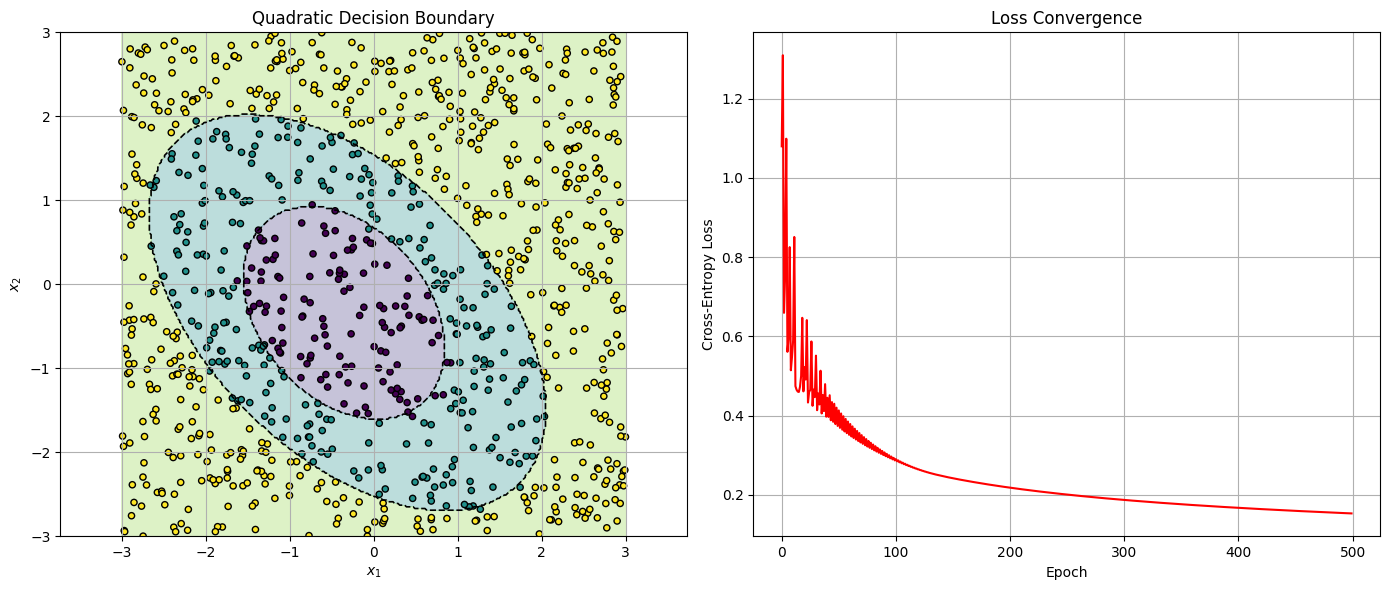

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for 3-class nonlinear classification
np.random.seed(0)
N = 1000
X = np.random.uniform(-3, 3, (N, 2))

def assign_label(x1, x2):
    val = x1**2 + x2**2 + x1*x2 + x1 + x2
    if val <= 1:
        return 0
    elif val < 4:
        return 1
    else:
        return 2

y = np.array([assign_label(x1, x2) for x1, x2 in X])

# One-hot encode labels
def one_hot(y, num_classes=3):
    return np.eye(num_classes)[y]

Y = one_hot(y)

# Expand features: include quadratic terms
def expand_features(X):
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]
    return np.hstack([x1, x2, x1**2, x2**2, x1 * x2])

X_exp = expand_features(X)

# Initialize weights and biases
W = np.random.randn(X_exp.shape[1], 3) * 0.01
b = np.zeros((1, 3))

# Softmax and loss
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    e_z = np.exp(z)
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def compute_loss(Y, P):
    eps = 1e-15
    P = np.clip(P, eps, 1 - eps)
    return -np.mean(np.sum(Y * np.log(P), axis=1))

# Training loop with loss tracking
learning_rate = 0.5
epochs = 500
losses = []

for epoch in range(epochs):
    Z = X_exp @ W + b
    P = softmax(Z)
    loss = compute_loss(Y, P)
    losses.append(loss)

    dZ = P - Y
    dW = X_exp.T @ dZ / N
    db = np.sum(dZ, axis=0, keepdims=True) / N

    W -= learning_rate * dW
    b -= learning_rate * db

# Predict function
def predict(X_input):
    X_exp = expand_features(X_input)
    P = softmax(X_exp @ W + b)
    return np.argmax(P, axis=1)

# Grid for decision boundary plot
xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-3, 3, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_exp = expand_features(grid)
probs = softmax(grid_exp @ W + b)
preds = np.argmax(probs, axis=1).reshape(xx.shape)

# Plot: left = decision boundary, right = convergence
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: decision boundary
axes[0].contourf(xx, yy, preds, levels=[-0.5, 0.5, 1.5, 2.5], cmap="viridis", alpha=0.3)
axes[0].contour(xx, yy, preds, levels=[0.5, 1.5], colors="black", linestyles='--', linewidths=1.2)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors="k", s=20)
axes[0].set_title("Quadratic Decision Boundary")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].axis('equal')
axes[0].grid(True)

# Subplot 2: loss convergence
axes[1].plot(losses, color='red')
axes[1].set_title("Loss Convergence")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Cross-Entropy Loss")
axes[1].grid(True)

plt.tight_layout()
plt.show()


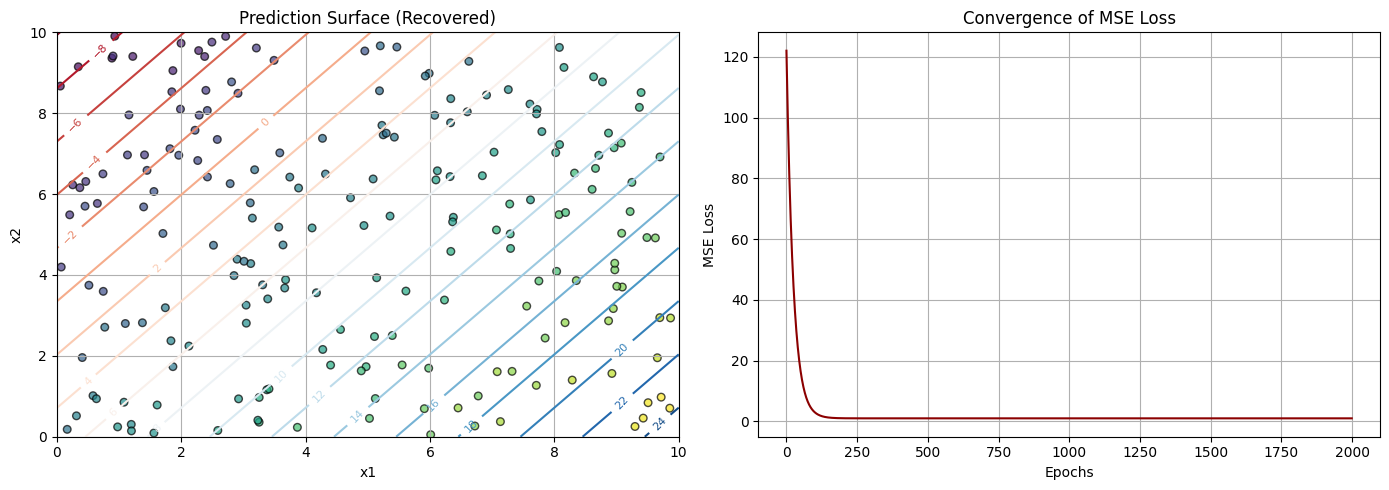

((np.float64(2.0009820101206004),
  np.float64(-1.5180311164884093),
  np.float64(5.082015244392835)),
 np.float64(0.9680638834948755))

In [ ]:
# Re-run after code execution state reset

import numpy as np
import matplotlib.pyplot as plt

# Set seed and sample size
np.random.seed(42)
N = 200

# Generate input features x1, x2 in range [0, 10]
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)

# True weights and bias
true_w1, true_w2, true_b = 2.0, -1.5, 5.0

# Add Gaussian noise to the output
noise = np.random.normal(0, 1.0, N)
y = true_w1 * x1 + true_w2 * x2 + true_b + noise

# Normalize features
mean_x1, std_x1 = x1.mean(), x1.std()
mean_x2, std_x2 = x2.mean(), x2.std()
x1_norm = (x1 - mean_x1) / std_x1
x2_norm = (x2 - mean_x2) / std_x2

# Stack features for training
X = np.column_stack((x1_norm, x2_norm))
y = y.reshape(-1, 1)

# Initialize parameters
W = np.random.randn(2, 1)
b = np.zeros((1,))

# Training settings
lr = 0.01
epochs = 2000
loss_history = []

# Gradient descent loop
for epoch in range(epochs):
    y_pred = X @ W + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Gradients
    dW = (2 / N) * (X.T @ error)
    db = (2 / N) * np.sum(error)

    # Update
    W -= lr * dW
    b -= lr * db

# Recover original parameters
w1_recovered = W[0][0] / std_x1
w2_recovered = W[1][0] / std_x2
b_recovered = b[0] - (W[0][0] * mean_x1 / std_x1) - (W[1][0] * mean_x2 / std_x2)

# Create meshgrid for decision boundary (level-set of prediction)
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
zz = w1_recovered * xx + w2_recovered * yy + b_recovered

# Plotting: Left = boundary, Right = loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision boundary plot (scatter + contour)
axes[0].scatter(x1, x2, c=y.flatten(), cmap='viridis', s=30, edgecolor='k', alpha=0.7)
cs = axes[0].contour(xx, yy, zz, levels=20, cmap='RdBu')
axes[0].clabel(cs, inline=True, fontsize=8)
axes[0].set_title("Prediction Surface (Recovered)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].grid(True)

# Loss convergence
axes[1].plot(loss_history, color='darkred')
axes[1].set_title("Convergence of MSE Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MSE Loss")
axes[1].grid(True)

plt.tight_layout()
plt.show()

(w1_recovered, w2_recovered, b_recovered), loss_history[-1]


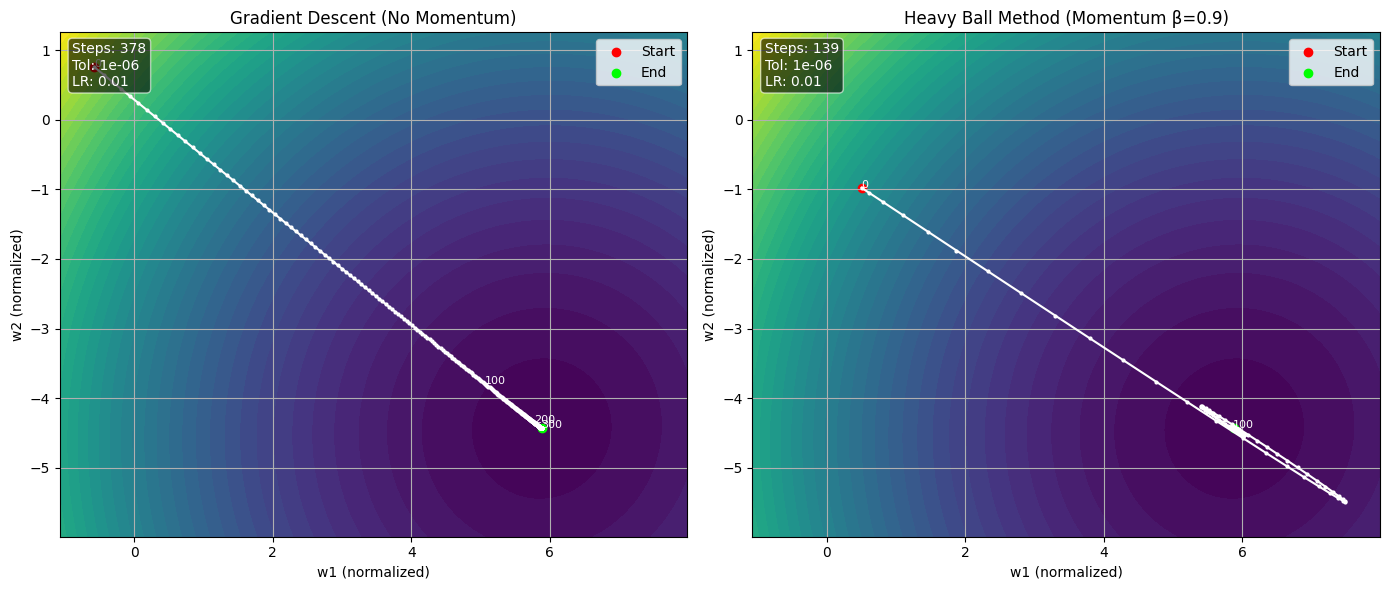

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Data Generation ===
np.random.seed(42)
N = 200
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
true_w1, true_w2, true_b = 2.0, -1.5, 5.0
noise = np.random.normal(0, 1.0, N)
y = true_w1 * x1 + true_w2 * x2 + true_b + noise

# Normalize inputs
mean_x1, std_x1 = x1.mean(), x1.std()
mean_x2, std_x2 = x2.mean(), x2.std()
x1_norm = (x1 - mean_x1) / std_x1
x2_norm = (x2 - mean_x2) / std_x2
X = np.column_stack((x1_norm, x2_norm))
y = y.reshape(-1, 1)

# === Loss surface (used by both plots) ===
def compute_loss_surface(b_fixed, X, y, w1_range, w2_range):
    W1, W2 = np.meshgrid(w1_range, w2_range)
    Loss = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W_tmp = np.array([[W1[i, j]], [W2[i, j]]])
            y_pred = X @ W_tmp + b_fixed
            Loss[i, j] = np.mean((y_pred - y) ** 2)
    return W1, W2, Loss

# === Gradient Descent Function with convergence check ===
def run_gradient_descent(momentum=False, beta=0.9, epochs=2000, lr=0.01, tol=1e-6):
    W = np.random.randn(2, 1)
    b = np.zeros((1,))
    vW = np.zeros_like(W)
    vb = np.zeros_like(b)
    W_hist = []
    loss_hist = []

    for epoch in range(epochs):
        y_pred = X @ W + b
        error = y_pred - y
        loss = np.mean(error ** 2)
        loss_hist.append(loss)
        W_hist.append(W.flatten().copy())

        if epoch > 0 and abs(loss_hist[-1] - loss_hist[-2]) < tol:
            return np.array(W_hist), b, epoch + 1  # +1 because epochs are 0-indexed

        dW = (2 / N) * X.T @ error
        db = (2 / N) * np.sum(error)

        if momentum:
            vW = beta * vW + lr * dW
            vb = beta * vb + lr * db
            W -= vW
            b -= vb
        else:
            W -= lr * dW
            b -= lr * db

    return np.array(W_hist), b, epochs

# === Run both methods ===
epochs = 2000
lr = 0.01
tol = 1e-6
W_gd, b_gd, steps_gd = run_gradient_descent(momentum=False, epochs=epochs, lr=lr, tol=tol)
W_mom, b_mom, steps_mom = run_gradient_descent(momentum=True, epochs=epochs, lr=lr, tol=tol)

# === Set grid range based on both runs ===
w1_vals = np.linspace(min(W_gd[:,0].min(), W_mom[:,0].min()) - 0.5,
                      max(W_gd[:,0].max(), W_mom[:,0].max()) + 0.5, 100)
w2_vals = np.linspace(min(W_gd[:,1].min(), W_mom[:,1].min()) - 0.5,
                      max(W_gd[:,1].max(), W_mom[:,1].max()) + 0.5, 100)

W1, W2, Loss = compute_loss_surface(b_mom, X, y, w1_vals, w2_vals)

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gradient Descent (no momentum) ---
axes[0].contourf(W1, W2, Loss, levels=50, cmap='viridis')
axes[0].plot(W_gd[:,0], W_gd[:,1], color='white', marker='o', markersize=2, linewidth=1.5)
axes[0].scatter(W_gd[0,0], W_gd[0,1], color='red', label='Start')
axes[0].scatter(W_gd[-1,0], W_gd[-1,1], color='lime', label='End')
for i in range(0, len(W_gd), 100):
    axes[0].text(W_gd[i,0], W_gd[i,1], str(i), fontsize=8, color='white')

# Top-left annotation
axes[0].text(0.02, 0.98,
             f"Steps: {steps_gd}\nTol: {tol}\nLR: {lr}",
             transform=axes[0].transAxes,
             fontsize=10, color='white', va='top', ha='left',
             bbox=dict(boxstyle="round,pad=0.3", fc="black", ec="white", alpha=0.6))

axes[0].set_title('Gradient Descent (No Momentum)')
axes[0].set_xlabel('w1 (normalized)')
axes[0].set_ylabel('w2 (normalized)')
axes[0].legend()
axes[0].grid(True)

# --- Heavy Ball Momentum ---
axes[1].contourf(W1, W2, Loss, levels=50, cmap='viridis')
axes[1].plot(W_mom[:,0], W_mom[:,1], color='white', marker='o', markersize=2, linewidth=1.5)
axes[1].scatter(W_mom[0,0], W_mom[0,1], color='red', label='Start')
axes[1].scatter(W_mom[-1,0], W_mom[-1,1], color='lime', label='End')
for i in range(0, len(W_mom), 100):
    axes[1].text(W_mom[i,0], W_mom[i,1], str(i), fontsize=8, color='white')

axes[1].text(0.02, 0.98,
             f"Steps: {steps_mom}\nTol: {tol}\nLR: {lr}",
             transform=axes[1].transAxes,
             fontsize=10, color='white', va='top', ha='left',
             bbox=dict(boxstyle="round,pad=0.3", fc="black", ec="white", alpha=0.6))

axes[1].set_title('Heavy Ball Method (Momentum β=0.9)')
axes[1].set_xlabel('w1 (normalized)')
axes[1].set_ylabel('w2 (normalized)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


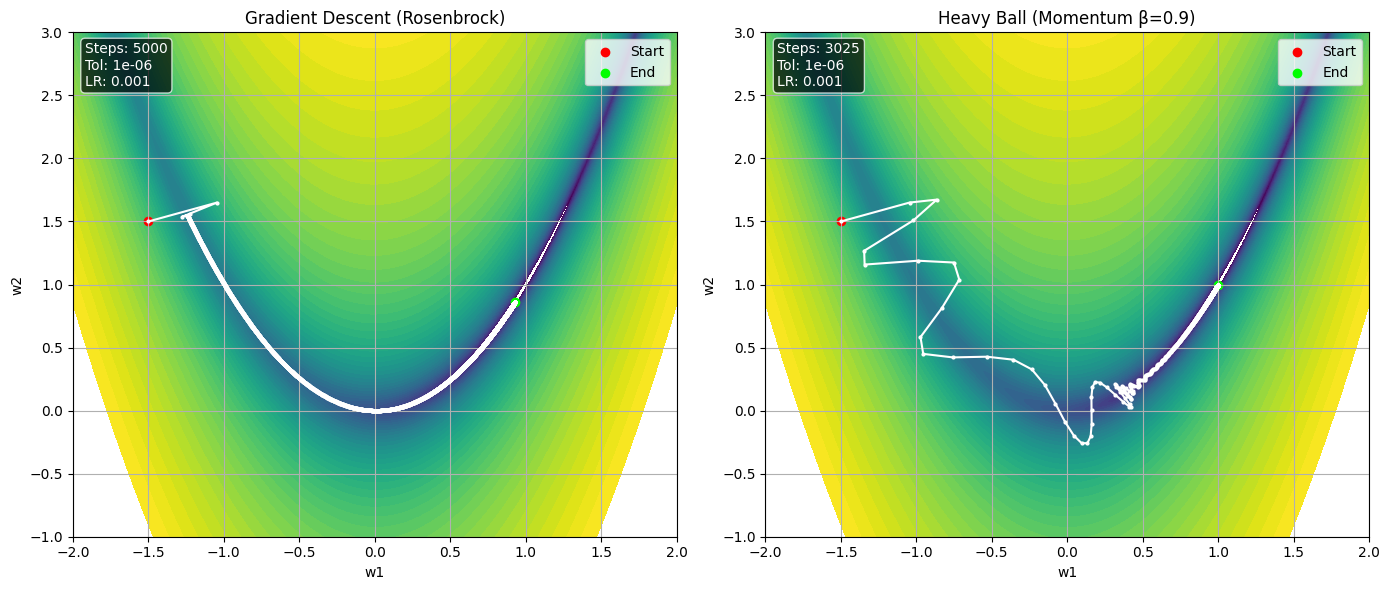

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and gradients
def rosenbrock(w):
    w1, w2 = w[0], w[1]
    return (1 - w1)**2 + 100 * (w2 - w1**2)**2

def rosenbrock_grad(w):
    w1, w2 = w[0], w[1]
    dw1 = -2*(1 - w1) - 400*w1*(w2 - w1**2)
    dw2 = 200*(w2 - w1**2)
    return np.array([dw1, dw2])

# Gradient descent with or without momentum
def optimize_rosenbrock(momentum=False, lr=0.001, beta=0.9, epochs=5000, tol=1e-6):
    w = np.array([-1.5, 1.5])  # Start away from minimum
    v = np.zeros_like(w)
    w_hist = [w.copy()]
    f_hist = [rosenbrock(w)]

    for i in range(epochs):
        grad = rosenbrock_grad(w)

        if momentum:
            v = beta * v + lr * grad
            w -= v
        else:
            w -= lr * grad

        w_hist.append(w.copy())
        f_hist.append(rosenbrock(w))

        if np.linalg.norm(grad) < tol:
            break

    return np.array(w_hist), f_hist, i + 1

# Run both
lr = 0.001
tol = 1e-6
steps = 5000

w_gd, f_gd, steps_gd = optimize_rosenbrock(momentum=False, lr=lr, epochs=steps, tol=tol)
w_mom, f_mom, steps_mom = optimize_rosenbrock(momentum=True, lr=lr, beta=0.9, epochs=steps, tol=tol)

# Plot loss surface
w1_vals = np.linspace(-2, 2, 400)
w2_vals = np.linspace(-1, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = (1 - W1)**2 + 100 * (W2 - W1**2)**2

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gradient Descent
axes[0].contourf(W1, W2, Z, levels=np.logspace(-1, 3, 50), norm='log', cmap='viridis')
axes[0].plot(w_gd[:, 0], w_gd[:, 1], color='white', marker='o', markersize=2, linewidth=1.5)
axes[0].scatter(w_gd[0,0], w_gd[0,1], color='red', label='Start')
axes[0].scatter(w_gd[-1,0], w_gd[-1,1], color='lime', label='End')
axes[0].set_title('Gradient Descent (Rosenbrock)')
axes[0].set_xlabel('w1')
axes[0].set_ylabel('w2')
axes[0].grid(True)
axes[0].legend()
axes[0].text(0.02, 0.98, f"Steps: {steps_gd}\nTol: {tol}\nLR: {lr}",
             transform=axes[0].transAxes, fontsize=10, color='white',
             va='top', ha='left', bbox=dict(boxstyle="round", fc="black", ec="white", alpha=0.7))

# Momentum
axes[1].contourf(W1, W2, Z, levels=np.logspace(-1, 3, 50), norm='log', cmap='viridis')
axes[1].plot(w_mom[:, 0], w_mom[:, 1], color='white', marker='o', markersize=2, linewidth=1.5)
axes[1].scatter(w_mom[0,0], w_mom[0,1], color='red', label='Start')
axes[1].scatter(w_mom[-1,0], w_mom[-1,1], color='lime', label='End')
axes[1].set_title('Heavy Ball (Momentum β=0.9)')
axes[1].set_xlabel('w1')
axes[1].set_ylabel('w2')
axes[1].grid(True)
axes[1].legend()
axes[1].text(0.02, 0.98, f"Steps: {steps_mom}\nTol: {tol}\nLR: {lr}",
             transform=axes[1].transAxes, fontsize=10, color='white',
             va='top', ha='left', bbox=dict(boxstyle="round", fc="black", ec="white", alpha=0.7))

plt.tight_layout()
plt.show()


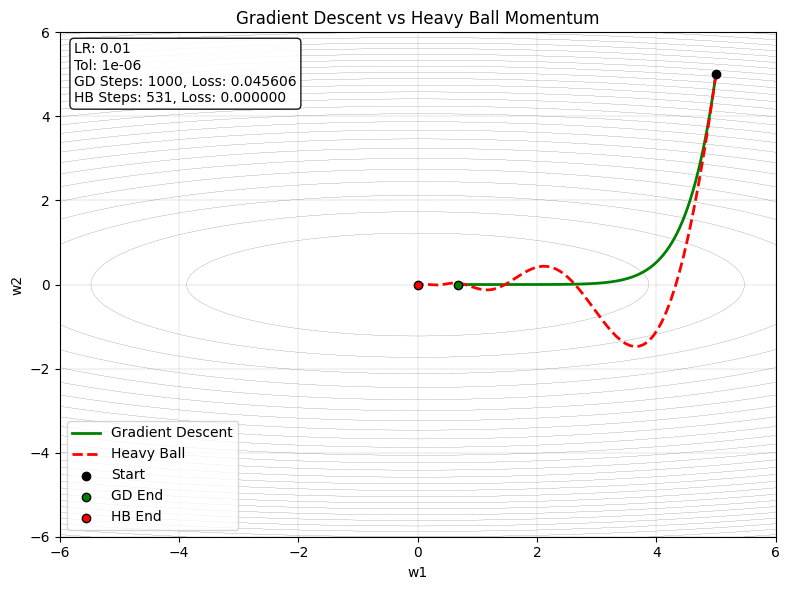

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valley function and gradient
def valley_fn(w):
    w1, w2 = w
    return 0.1 * w1**2 + w2**2

def valley_grad(w):
    w1, w2 = w
    return np.array([0.2 * w1, 2 * w2])

# Gradient Descent
def gradient_descent(lr=0.1, tol=1e-6, epochs=1000):
    x = np.array([5.0, 5.0])
    path = [x.copy()]
    losses = [valley_fn(x)]

    for i in range(epochs):
        grad = valley_grad(x)
        x = x - lr * grad
        path.append(x.copy())
        losses.append(valley_fn(x))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), losses, i + 1

# Heavy Ball (classic formulation)
def heavy_ball_classic(alpha=0.1, beta=0.9, tol=1e-6, epochs=1000):
    x_prev = np.array([5.0, 5.0])
    x = x_prev.copy()
    path = [x.copy()]
    losses = [valley_fn(x)]

    for i in range(epochs):
        grad = valley_grad(x)
        y = beta * (x - x_prev)
        x_next = x - alpha * grad + y
        x_prev = x
        x = x_next
        path.append(x.copy())
        losses.append(valley_fn(x))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), losses, i + 1

# Run both methods
lr = 0.01
tol = 1e-6
path_gd, loss_gd, steps_gd = gradient_descent(lr=lr, tol=tol)
path_hb, loss_hb, steps_hb = heavy_ball_classic(alpha=lr, beta=0.9, tol=tol)

# Contour grid
w1_vals = np.linspace(-6, 6, 400)
w2_vals = np.linspace(-6, 6, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = 0.1 * W1**2 + W2**2

# Plotting
plt.figure(figsize=(8, 6))
plt.contour(W1, W2, Z, levels=30, colors='black', linewidths=0.1)

# Paths
plt.plot(path_gd[:, 0], path_gd[:, 1], color='green', linewidth=2, label='Gradient Descent')
plt.plot(path_hb[:, 0], path_hb[:, 1], color='red', linestyle='--', linewidth=2, label='Heavy Ball')

# Markers
plt.scatter(path_gd[0, 0], path_gd[0, 1], color='black', label='Start', zorder=5)
plt.scatter(path_gd[-1, 0], path_gd[-1, 1], color='green', edgecolor='black', label='GD End', zorder=5)
plt.scatter(path_hb[-1, 0], path_hb[-1, 1], color='red', edgecolor='black', label='HB End', zorder=5)

# Annotation
text = (
    f"LR: {lr}\nTol: {tol}\n"
    f"GD Steps: {steps_gd}, Loss: {loss_gd[-1]:.6f}\n"
    f"HB Steps: {steps_hb}, Loss: {loss_hb[-1]:.6f}"
)
plt.text(0.02, 0.98, text, transform=plt.gca().transAxes,
         fontsize=10, color='black', va='top', ha='left',
         bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.9))

# Finalize plot
plt.title("Gradient Descent vs Heavy Ball Momentum")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.grid(True, which='both', linewidth=0.2, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


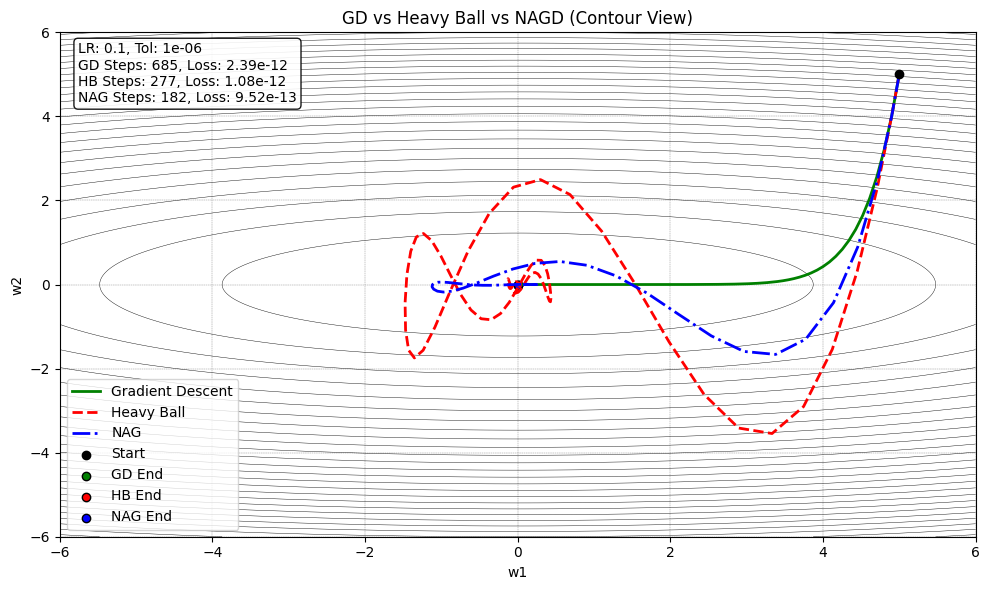

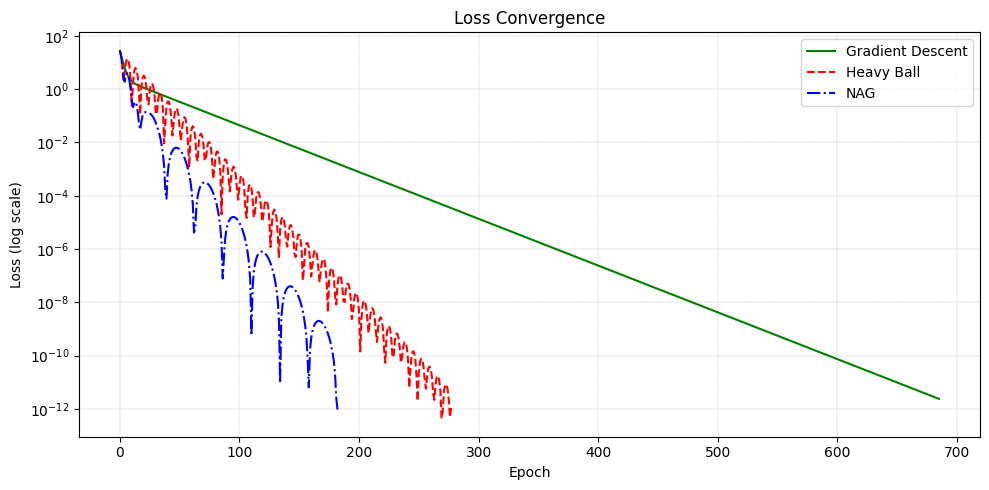

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and gradient
def valley_fn(w):
    return 0.1 * w[0]**2 + w[1]**2

def valley_grad(w):
    return np.array([0.2 * w[0], 2.0 * w[1]])

# Gradient Descent
def gradient_descent(lr=0.1, tol=1e-6, epochs=5000):
    x = np.array([5.0, 5.0])
    path, loss = [x.copy()], [valley_fn(x)]
    for i in range(epochs):
        grad = valley_grad(x)
        x -= lr * grad
        path.append(x.copy())
        loss.append(valley_fn(x))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), loss, i + 1

# Heavy Ball
def heavy_ball(alpha=0.1, beta=0.9, tol=1e-6, epochs=5000):
    x_prev = np.array([5.0, 5.0])
    x = x_prev.copy()
    path, loss = [x.copy()], [valley_fn(x)]
    for i in range(epochs):
        grad = valley_grad(x)
        y = beta * (x - x_prev)
        x_next = x - alpha * grad + y
        x_prev = x
        x = x_next
        path.append(x.copy())
        loss.append(valley_fn(x))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), loss, i + 1

# Nesterov Accelerated Gradient
def nesterov(alpha=0.1, beta=0.9, tol=1e-6, epochs=5000):
    x = np.array([5.0, 5.0])
    v = np.zeros_like(x)
    path, loss = [x.copy()], [valley_fn(x)]
    for i in range(epochs):
        lookahead = x - beta * v
        grad = valley_grad(lookahead)
        v = beta * v + alpha * grad
        x -= v
        path.append(x.copy())
        loss.append(valley_fn(x))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), loss, i + 1

# Run methods
lr = 0.1
tol = 1e-6
gd_path, gd_loss, gd_steps = gradient_descent(lr, tol)
hb_path, hb_loss, hb_steps = heavy_ball(lr, 0.9, tol)
nag_path, nag_loss, nag_steps = nesterov(lr, 0.9, tol)

# Contour grid
w1_vals = np.linspace(-6, 6, 400)
w2_vals = np.linspace(-6, 6, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = 0.1 * W1**2 + W2**2

# Plot 1: Contours + paths
plt.figure(figsize=(10, 6))
plt.contour(W1, W2, Z, levels=30, colors='black', linewidths=0.3)
plt.grid(True, linewidth=0.3, linestyle='--', color='gray')

plt.plot(gd_path[:, 0], gd_path[:, 1], color='green', label='Gradient Descent', linewidth=2)
plt.plot(hb_path[:, 0], hb_path[:, 1], color='red', linestyle='--', label='Heavy Ball', linewidth=2)
plt.plot(nag_path[:, 0], nag_path[:, 1], color='blue', linestyle='-.', label='NAG', linewidth=2)

plt.scatter(gd_path[0, 0], gd_path[0, 1], color='black', label='Start', zorder=5)
plt.scatter(gd_path[-1, 0], gd_path[-1, 1], color='green', edgecolor='black', label='GD End')
plt.scatter(hb_path[-1, 0], hb_path[-1, 1], color='red', edgecolor='black', label='HB End')
plt.scatter(nag_path[-1, 0], nag_path[-1, 1], color='blue', edgecolor='black', label='NAG End')

text = (
    f"LR: {lr}, Tol: {tol}\n"
    f"GD Steps: {gd_steps}, Loss: {gd_loss[-1]:.2e}\n"
    f"HB Steps: {hb_steps}, Loss: {hb_loss[-1]:.2e}\n"
    f"NAG Steps: {nag_steps}, Loss: {nag_loss[-1]:.2e}"
)
plt.text(0.02, 0.98, text, transform=plt.gca().transAxes,
         fontsize=10, color='black', va='top', ha='left',
         bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.9))

plt.title("GD vs Heavy Ball vs NAGD (Contour View)")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.tight_layout()

# Plot 2: Convergence
plt.figure(figsize=(10, 5))
plt.plot(gd_loss, label='Gradient Descent', color='green')
plt.plot(hb_loss, label='Heavy Ball', color='red', linestyle='--')
plt.plot(nag_loss, label='NAG', color='blue', linestyle='-.')
plt.yscale('log')
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Loss Convergence")
plt.grid(True, linestyle='--', linewidth=0.3)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-70-323420566.py:6: RuntimeWarning: overflow encountered in scalar power
  return (w[0]-2)**2 + (w[1]-5)**2


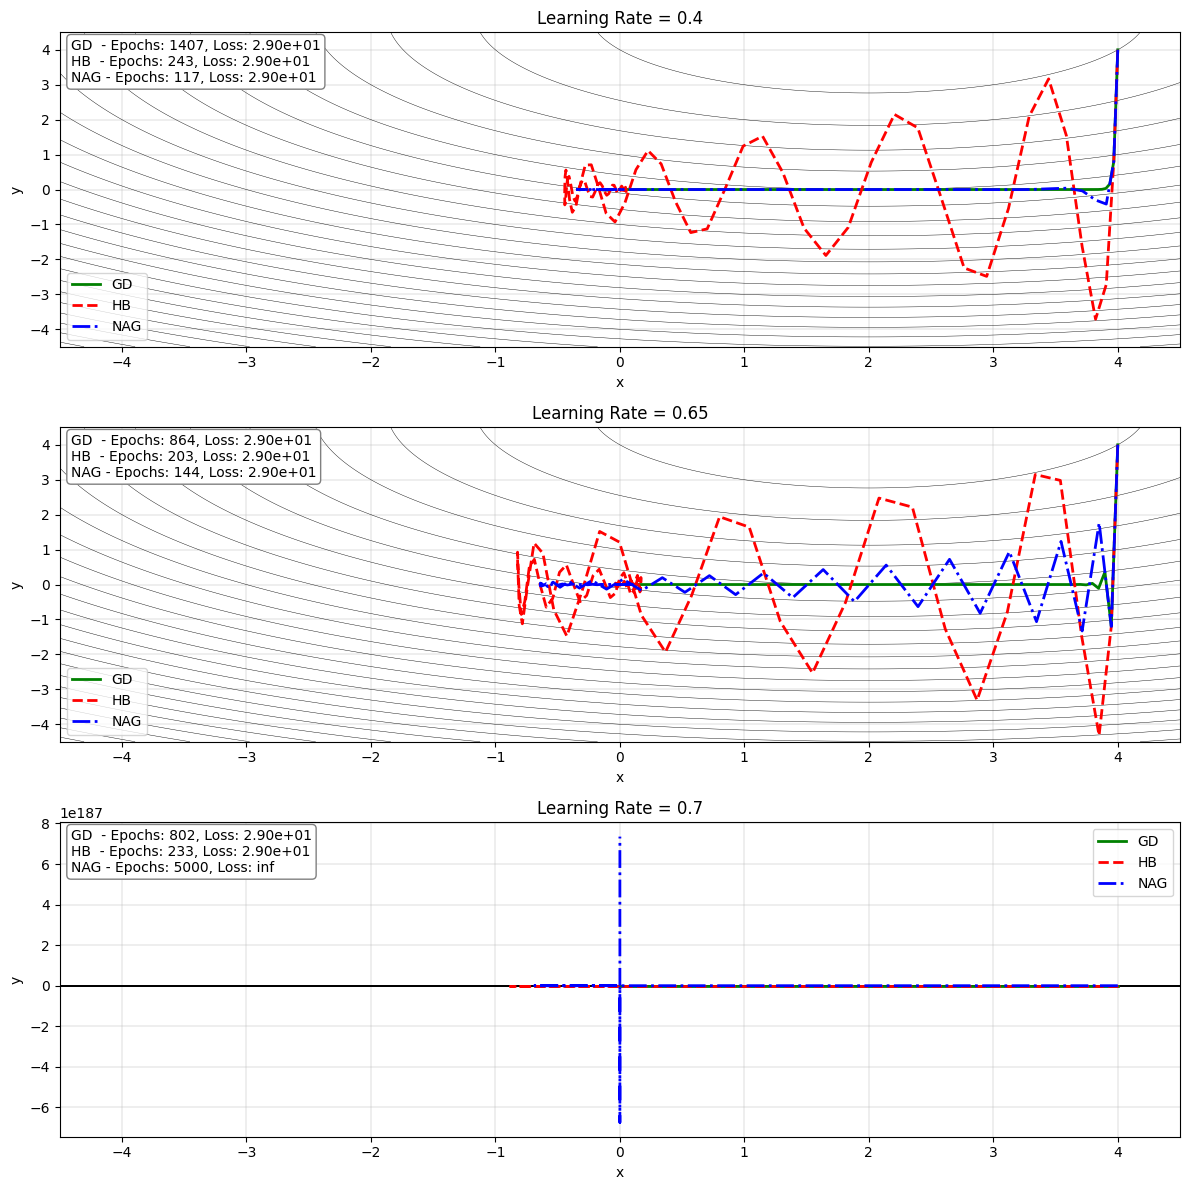

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and gradient
def valley_fn(w):
    return (w[0]-2)**2 + (w[1]-5)**2

def valley_grad(w):
    return np.array([0.02 * w[0], 2.0 * w[1]])

# Gradient Descent
def gradient_descent(lr, tol=1e-6, epochs=5000):
    x = np.array([4.0, 4.0])
    path = [x.copy()]
    for i in range(epochs):
        grad = valley_grad(x)
        x -= lr * grad
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), valley_fn(x), i + 1

# Heavy Ball Momentum
def heavy_ball(alpha, beta=0.9, tol=1e-6, epochs=5000):
    x_prev = np.array([4.0, 4.0])
    x = x_prev.copy()
    path = [x.copy()]
    for i in range(epochs):
        grad = valley_grad(x)
        y = beta * (x - x_prev)
        x_next = x - alpha * grad + y
        x_prev = x
        x = x_next
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), valley_fn(x), i + 1

# Nesterov Accelerated Gradient
def nesterov(alpha, beta=0.9, tol=1e-6, epochs=5000):
    x = np.array([4.0, 4.0])
    v = np.zeros_like(x)
    path = [x.copy()]
    for i in range(epochs):
        lookahead = x - beta * v
        grad = valley_grad(lookahead)
        v = beta * v + alpha * grad
        x -= v
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), valley_fn(x), i + 1

# Plotting
learning_rates = [0.4, 0.65, 0.7]
fig, axes = plt.subplots(len(learning_rates), 1, figsize=(12, 12))

# Contour grid
w1_vals = np.linspace(-4.5, 4.5, 400)
w2_vals = np.linspace(-4.5, 4.5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = valley_fn([W1, W2])

for i, lr in enumerate(learning_rates):
    ax = axes[i]
    gd_path, gd_loss, gd_steps = gradient_descent(lr)
    hb_path, hb_loss, hb_steps = heavy_ball(lr)
    nag_path, nag_loss, nag_steps = nesterov(lr)

    ax.contour(W1, W2, Z, levels=30, colors='black', linewidths=0.3)
    ax.plot(gd_path[:, 0], gd_path[:, 1], 'g-', label='GD', linewidth=2)
    ax.plot(hb_path[:, 0], hb_path[:, 1], 'r--', label='HB', linewidth=2)
    ax.plot(nag_path[:, 0], nag_path[:, 1], 'b-.', label='NAG', linewidth=2)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Learning Rate = {lr}")

    text = (
        f"GD  - Epochs: {gd_steps}, Loss: {gd_loss:.2e}\n"
        f"HB  - Epochs: {hb_steps}, Loss: {hb_loss:.2e}\n"
        f"NAG - Epochs: {nag_steps}, Loss: {nag_loss:.2e}"
    )
    ax.text(0.01, 0.98, text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    ax.grid(True, linewidth=0.3)
    ax.legend()

plt.tight_layout()
plt.show()


Epoch 0: Loss = 63.3837
Epoch 200: Loss = 0.3008
Epoch 400: Loss = 0.2454
Epoch 600: Loss = 0.2397
Epoch 800: Loss = 0.2387
Epoch 1000: Loss = 0.2385
Epoch 1200: Loss = 0.2385
Epoch 1400: Loss = 0.2385
Epoch 1600: Loss = 0.2385
Epoch 1800: Loss = 0.2385


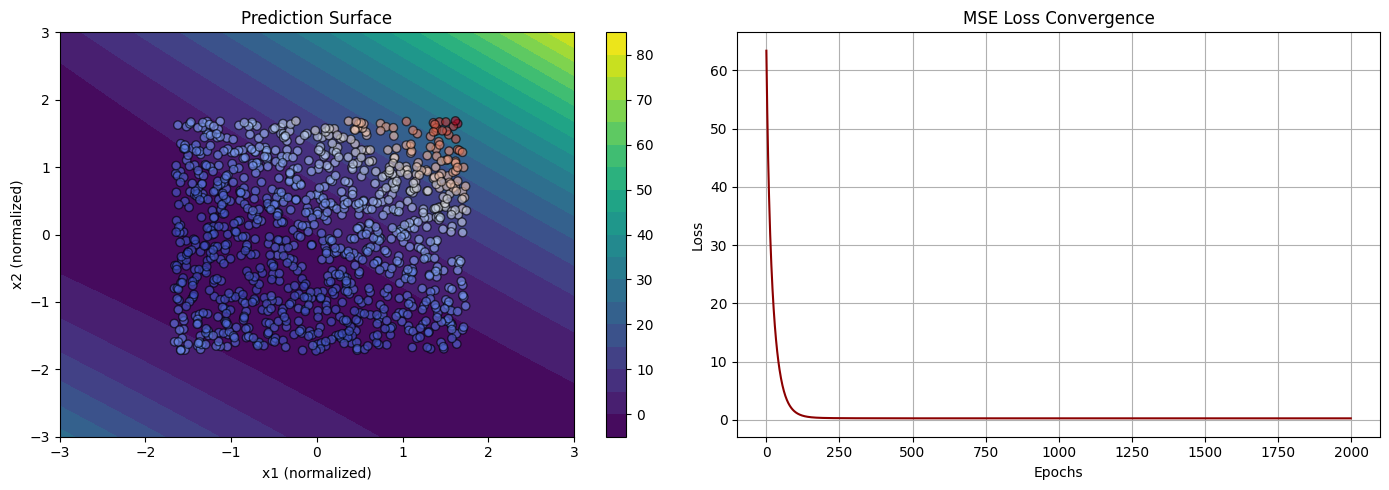

[[0.99334991]
 [2.00314719]
 [2.98017739]
 [3.99566997]
 [4.99916355]] [0.01058028]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data generation
np.random.seed(42)
N = 1000
x1 = np.random.uniform(-5, 5, N)
x2 = np.random.uniform(-5, 5, N)

# Normalize features
x1_mean, x1_std = x1.mean(), x1.std()
x2_mean, x2_std = x2.mean(), x2.std()
x1n = (x1 - x1_mean) / x1_std
x2n = (x2 - x2_mean) / x2_std

# True output with noise
y_true = x1n**2 + 2*x2n**2 + 3*x1n * x2n + 4*x1n + 5*x2n
noise = np.random.normal(0, 0.5, N)
y = y_true + noise
y = y.reshape(-1, 1)

# 2. Feature expansion
X = np.column_stack([
    x1n**2,
    x2n**2,
    x1n * x2n,
    x1n,
    x2n
])

# 3. Initialize weights
W = np.random.randn(X.shape[1], 1) * 0.01
b = np.zeros((1,))
lr = 0.01
epochs = 2000
loss_history = []

# 4. Gradient Descent
for epoch in range(epochs):
    y_pred = X @ W + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    dW = (2 / N) * (X.T @ error)
    db = (2 / N) * np.sum(error)

    W -= lr * dW
    b -= lr * db

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# 5. Plot results
x1g, x2g = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
phi_grid = np.column_stack([
    x1g.ravel()**2, x2g.ravel()**2,
    x1g.ravel() * x2g.ravel(), x1g.ravel(), x2g.ravel()
])
y_grid = phi_grid @ W + b
zz = y_grid.reshape(x1g.shape)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cs = axes[0].contourf(x1g, x2g, zz, levels=20, cmap="viridis")
axes[0].scatter(x1n, x2n, c=y.flatten(), cmap="coolwarm", edgecolor='k', alpha=0.6)
axes[0].set_title("Prediction Surface")
axes[0].set_xlabel("x1 (normalized)")
axes[0].set_ylabel("x2 (normalized)")
fig.colorbar(cs, ax=axes[0])

axes[1].plot(loss_history, color='darkred')
axes[1].set_title("MSE Loss Convergence")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].grid(True)

plt.tight_layout()
plt.show()

print (W, b)
